# matrix fold of gate XOR adapted to qiskit

In [1]:
# Checking the version of PYTHON; we only support > 3.5
import sys
sys.path.append('../../../Transferências/qiskit-sdk-py-master')

if sys.version_info < (3,5):
    raise Exception('Please use Python version 3.5 or greater.')

import qiskit
import numpy

# Import the QISKit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QuantumProgram, Result
from qiskit import available_backends, execute, register, get_backend
import getpass, time
import Qconfig
from qiskit import compile


# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state

#information of API
from IBMQuantumExperience import IBMQuantumExperience

# Import tomography tools
import qiskit.tools.qcvv.tomography as tomo

# Aditional packages
from qiskit.tools.qi.qi import *

In [2]:
api = IBMQuantumExperience(Qconfig.APItoken)
myCredits = api.get_my_credits()

print(myCredits)

# set the APIToken and API url
try:
    register(Qconfig.APItoken,Qconfig.config['url'])

    print('\nYou have access to great power!')
    print(available_backends({'local': False, 'simulator': False}))
    print('Available simulators:')
    print(available_backends({'simulator':True}))
except: 
    print('Something went wrong.\nDid you enter a correct token?')

{'maxUserType': 15, 'promotional': 0, 'remaining': 15}

You have access to great power!
['ibmq_16_rueschlikon', 'ibmq_5_tenerife', 'ibmq_5_yorktown']
Available simulators:
['ibmq_qasm_simulator', 'local_qasm_simulator', 'local_statevector_simulator', 'local_unitary_simulator']


In [3]:
# Creating Programs
# create QuantumProgram object instance.
qp = QuantumProgram()

# Creating Registers
# create Quantum Register called "qr" with 7 qubits 
qr = qp.create_quantum_register('qr', 7)
# create Classical Register  called "cr" with 7 bits
cr = qp.create_classical_register('cr', 7)

# Creating Circuits
# create Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qc = qp.create_circuit('Circuit', [qr], [cr])

In [4]:
# Get the components.

# get the circuit by Name
circuit = qp.get_circuit('Circuit')

# get the Quantum Register by Name
quantum_r = qp.get_quantum_register('qr')

# get the Classical Register by Name
classical_r = qp.get_classical_register('cr')

In [5]:
#preparing qubits
qc.x(qr[2])
qc.x(qr[3])
qc.x(qr[4])
qc.x(qr[5])
qc.x(qr[6])


# the circuit we want:
qc.h(qr[1])
qc.cx(qr[1],qr[6])
qc.cx(qr[6],qr[5])
qc.t(qr[6])
qc.tdg(qr[5])
qc.cx(qr[1],qr[6])
qc.cx(qr[6],qr[5])
qc.tdg(qr[1])
qc.t(qr[5])
qc.cx(qr[1],qr[5])
qc.h(qr[1])
qc.h(qr[0])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.t(qr[4])
qc.tdg(qr[3])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.tdg(qr[0])
qc.t(qr[3])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.h(qr[2])
qc.t(qr[2])
qc.t(qr[1])
qc.t(qr[0])
qc.cx(qr[1],qr[0])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[2])
qc.tdg(qr[1])
qc.t(qr[2])
qc.cx(qr[0],qr[1])
qc.tdg(qr[1])
qc.tdg(qr[0])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[2])
qc.cx(qr[1],qr[0])
qc.h(qr[2])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.tdg(qr[3])
qc.t(qr[0])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.t(qr[3])
qc.tdg(qr[4])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.h(qr[0])
qc.h(qr[1])
qc.cx(qr[1],qr[5])
qc.tdg(qr[5])
qc.t(qr[1])
qc.cx(qr[6],qr[5])
qc.cx(qr[1],qr[6])
qc.t(qr[5])
qc.tdg(qr[6])
qc.cx(qr[6],qr[5])
qc.cx(qr[1],qr[6])
qc.h(qr[1])
qc.barrier(qr[1])
qc.h(qr[1])
qc.cx(qr[1],qr[6])
qc.cx(qr[6],qr[5])
qc.t(qr[6])
qc.tdg(qr[5])
qc.cx(qr[1],qr[6])
qc.cx(qr[6],qr[5])
qc.tdg(qr[1])
qc.t(qr[5])
qc.cx(qr[1],qr[5])
qc.h(qr[1])
qc.barrier(qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.t(qr[4])
qc.t(qr[3])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.tdg(qr[0])
qc.tdg(qr[3])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.h(qr[2])
qc.t(qr[2])
qc.t(qr[1])
qc.t(qr[0])
qc.cx(qr[1],qr[0])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[2])
qc.tdg(qr[1])
qc.t(qr[2])
qc.cx(qr[0],qr[1])
qc.tdg(qr[1])
qc.tdg(qr[0])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[2])
qc.cx(qr[1],qr[0])
qc.h(qr[2])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.t(qr[3])
qc.t(qr[0])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.tdg(qr[3])
qc.tdg(qr[4])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.h(qr[0])
qc.h(qr[1])
qc.cx(qr[1],qr[5])
qc.tdg(qr[5])
qc.t(qr[1])
qc.cx(qr[6],qr[5])
qc.cx(qr[1],qr[6])
qc.t(qr[5])
qc.tdg(qr[6])
qc.cx(qr[6],qr[5])
qc.cx(qr[1],qr[6])
qc.h(qr[1])
qc.barrier(qr[1])
qc.h(qr[1])
qc.cx(qr[1],qr[6])
qc.cx(qr[6],qr[5])
qc.t(qr[6])
qc.t(qr[5])
qc.cx(qr[1],qr[6])
qc.cx(qr[6],qr[5])
qc.tdg(qr[1])
qc.tdg(qr[5])
qc.cx(qr[1],qr[5])
qc.h(qr[1])
qc.barrier(qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.t(qr[4])
qc.t(qr[3])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.tdg(qr[0])
qc.tdg(qr[3])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.h(qr[2])
qc.t(qr[2])
qc.t(qr[1])
qc.t(qr[0])
qc.cx(qr[1],qr[0])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[2])
qc.tdg(qr[1])
qc.t(qr[2])
qc.cx(qr[0],qr[1])
qc.tdg(qr[1])
qc.tdg(qr[0])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[2])
qc.cx(qr[1],qr[0])
qc.h(qr[2])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.t(qr[3])
qc.t(qr[0])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.tdg(qr[3])
qc.tdg(qr[4])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.h(qr[0])
qc.h(qr[1])
qc.cx(qr[1],qr[5])
qc.t(qr[5])
qc.t(qr[1])
qc.cx(qr[6],qr[5])
qc.cx(qr[1],qr[6])
qc.tdg(qr[5])
qc.tdg(qr[6])
qc.cx(qr[6],qr[5])
qc.cx(qr[1],qr[6])
qc.h(qr[1])
qc.barrier(qr[1])
qc.h(qr[1])
qc.cx(qr[1],qr[6])
qc.cx(qr[6],qr[5])
qc.t(qr[6])
qc.t(qr[5])
qc.cx(qr[1],qr[6])
qc.cx(qr[6],qr[5])
qc.tdg(qr[1])
qc.tdg(qr[5])
qc.cx(qr[1],qr[5])
qc.h(qr[1])
qc.barrier(qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.tdg(qr[4])
qc.t(qr[3])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.tdg(qr[0])
qc.t(qr[3])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.h(qr[2])
qc.t(qr[2])
qc.t(qr[1])
qc.t(qr[0])
qc.cx(qr[1],qr[0])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[2])
qc.tdg(qr[1])
qc.t(qr[2])
qc.cx(qr[0],qr[1])
qc.tdg(qr[1])
qc.tdg(qr[0])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[2])
qc.cx(qr[1],qr[0])
qc.h(qr[2])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.tdg(qr[3])
qc.t(qr[0])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.tdg(qr[3])
qc.t(qr[4])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.h(qr[0])
qc.h(qr[1])
qc.cx(qr[1],qr[5])
qc.t(qr[5])
qc.t(qr[1])
qc.cx(qr[6],qr[5])
qc.cx(qr[1],qr[6])
qc.tdg(qr[5])
qc.tdg(qr[6])
qc.cx(qr[6],qr[5])
qc.cx(qr[1],qr[6])
qc.h(qr[1])
qc.barrier(qr[1])
qc.h(qr[1])
qc.cx(qr[1],qr[6])
qc.cx(qr[6],qr[5])
qc.t(qr[6])
qc.t(qr[5])
qc.cx(qr[1],qr[6])
qc.cx(qr[6],qr[5])
qc.tdg(qr[1])
qc.tdg(qr[5])
qc.cx(qr[1],qr[5])
qc.h(qr[1])
qc.barrier(qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.tdg(qr[4])
qc.tdg(qr[3])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.tdg(qr[0])
qc.tdg(qr[3])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.h(qr[2])
qc.t(qr[2])
qc.t(qr[1])
qc.t(qr[0])
qc.cx(qr[1],qr[0])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[2])
qc.tdg(qr[1])
qc.t(qr[2])
qc.cx(qr[0],qr[1])
qc.tdg(qr[1])
qc.tdg(qr[0])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[2])
qc.cx(qr[1],qr[0])
qc.h(qr[2])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.t(qr[3])
qc.t(qr[0])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.t(qr[3])
qc.t(qr[4])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.h(qr[0])
qc.h(qr[1])
qc.cx(qr[1],qr[5])
qc.t(qr[5])
qc.t(qr[1])
qc.cx(qr[6],qr[5])
qc.cx(qr[1],qr[6])
qc.tdg(qr[5])
qc.tdg(qr[6])
qc.cx(qr[6],qr[5])
qc.cx(qr[1],qr[6])
qc.h(qr[1])
qc.barrier(qr[1])
qc.h(qr[1])
qc.cx(qr[1],qr[6])
qc.cx(qr[6],qr[5])
qc.tdg(qr[6])
qc.t(qr[5])
qc.cx(qr[1],qr[6])
qc.cx(qr[6],qr[5])
qc.tdg(qr[1])
qc.t(qr[5])
qc.cx(qr[1],qr[5])
qc.h(qr[1])
qc.barrier(qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.t(qr[4])
qc.t(qr[3])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.tdg(qr[0])
qc.tdg(qr[3])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.h(qr[2])
qc.t(qr[2])
qc.t(qr[1])
qc.t(qr[0])
qc.cx(qr[1],qr[0])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[2])
qc.tdg(qr[1])
qc.t(qr[2])
qc.cx(qr[0],qr[1])
qc.tdg(qr[1])
qc.tdg(qr[0])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[2])
qc.cx(qr[1],qr[0])
qc.h(qr[2])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.t(qr[3])
qc.t(qr[0])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.tdg(qr[3])
qc.tdg(qr[4])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.h(qr[0])
qc.h(qr[1])
qc.cx(qr[1],qr[5])
qc.tdg(qr[5])
qc.t(qr[1])
qc.cx(qr[6],qr[5])
qc.cx(qr[1],qr[6])
qc.tdg(qr[5])
qc.t(qr[6])
qc.cx(qr[6],qr[5])
qc.cx(qr[1],qr[6])
qc.h(qr[1])
qc.barrier(qr[1])
qc.h(qr[1])
qc.cx(qr[1],qr[6])
qc.cx(qr[6],qr[5])
qc.tdg(qr[6])
qc.t(qr[5])
qc.cx(qr[1],qr[6])
qc.cx(qr[6],qr[5])
qc.tdg(qr[1])
qc.t(qr[5])
qc.cx(qr[1],qr[5])
qc.h(qr[1])
qc.barrier(qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.tdg(qr[4])
qc.t(qr[3])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.tdg(qr[0])
qc.t(qr[3])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.h(qr[2])
qc.t(qr[2])
qc.t(qr[1])
qc.t(qr[0])
qc.cx(qr[1],qr[0])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[2])
qc.tdg(qr[1])
qc.t(qr[2])
qc.cx(qr[0],qr[1])
qc.tdg(qr[1])
qc.tdg(qr[0])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[2])
qc.cx(qr[1],qr[0])
qc.h(qr[2])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.tdg(qr[3])
qc.t(qr[0])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.tdg(qr[3])
qc.t(qr[4])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.h(qr[0])
qc.h(qr[1])
qc.cx(qr[1],qr[5])
qc.tdg(qr[5])
qc.t(qr[1])
qc.cx(qr[6],qr[5])
qc.cx(qr[1],qr[6])
qc.tdg(qr[5])
qc.t(qr[6])
qc.cx(qr[6],qr[5])
qc.cx(qr[1],qr[6])
qc.h(qr[1])
qc.barrier(qr[1])
qc.h(qr[1])
qc.cx(qr[1],qr[6])
qc.cx(qr[6],qr[5])
qc.tdg(qr[6])
qc.t(qr[5])
qc.cx(qr[1],qr[6])
qc.cx(qr[6],qr[5])
qc.tdg(qr[1])
qc.t(qr[5])
qc.cx(qr[1],qr[5])
qc.h(qr[1])
qc.barrier(qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.tdg(qr[4])
qc.tdg(qr[3])
qc.cx(qr[0],qr[4])
qc.cx(qr[4],qr[3])
qc.tdg(qr[0])
qc.tdg(qr[3])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.h(qr[2])
qc.t(qr[2])
qc.t(qr[1])
qc.t(qr[0])
qc.cx(qr[1],qr[0])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[2])
qc.tdg(qr[1])
qc.t(qr[2])
qc.cx(qr[0],qr[1])
qc.tdg(qr[1])
qc.tdg(qr[0])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[2])
qc.cx(qr[1],qr[0])
qc.h(qr[2])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.t(qr[3])
qc.t(qr[0])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.t(qr[3])
qc.t(qr[4])
qc.cx(qr[4],qr[3])
qc.cx(qr[0],qr[4])
qc.h(qr[0])
qc.h(qr[1])
qc.cx(qr[1],qr[5])
qc.tdg(qr[5])
qc.t(qr[1])
qc.cx(qr[6],qr[5])
qc.cx(qr[1],qr[6])
qc.tdg(qr[5])
qc.t(qr[6])
qc.cx(qr[6],qr[5])
qc.cx(qr[1],qr[6])
qc.h(qr[1])

# don't forget update the number of qubits and bits registered


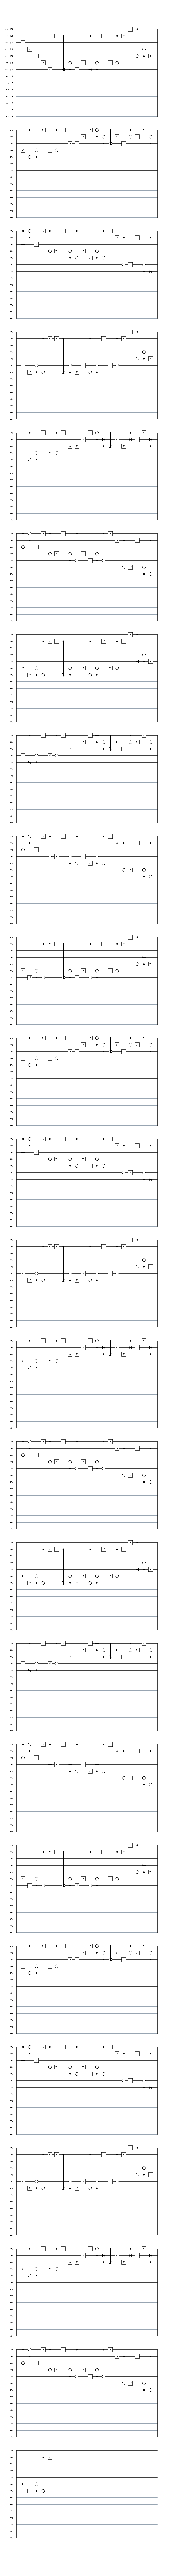

In [6]:
circuit_drawer(qc)

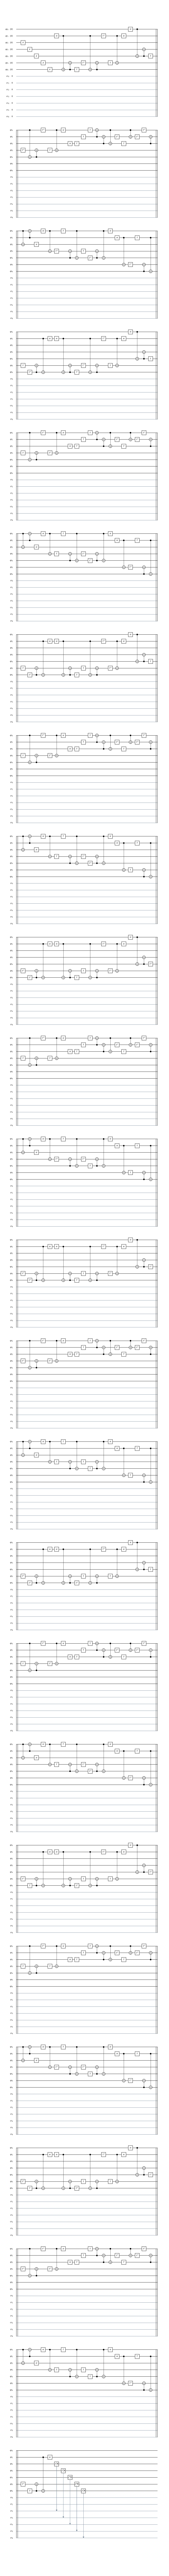

In [7]:
qc.barrier(qr[2])
qc.barrier(qr[3])
qc.barrier(qr[4])
qc.barrier(qr[5])
qc.barrier(qr[6])

qc.measure(qr[2],cr[2])
qc.measure(qr[3],cr[3])
qc.measure(qr[4],cr[4])
qc.measure(qr[5],cr[5])
qc.measure(qr[6],cr[6])

circuit_drawer(qc)

In [8]:
qp.get_circuit_names()

['Circuit']

In [9]:
# QASM from a program

QASM_source = qp.get_qasm('Circuit')

print(QASM_source)

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[7];
creg cr[7];
x qr[2];
x qr[3];
x qr[4];
x qr[5];
x qr[6];
h qr[1];
cx qr[1],qr[6];
cx qr[6],qr[5];
t qr[6];
tdg qr[5];
cx qr[1],qr[6];
cx qr[6],qr[5];
tdg qr[1];
t qr[5];
cx qr[1],qr[5];
h qr[1];
h qr[0];
cx qr[0],qr[4];
cx qr[4],qr[3];
t qr[4];
tdg qr[3];
cx qr[0],qr[4];
cx qr[4],qr[3];
tdg qr[0];
t qr[3];
cx qr[0],qr[3];
h qr[0];
h qr[2];
t qr[2];
t qr[1];
t qr[0];
cx qr[1],qr[0];
cx qr[2],qr[1];
cx qr[0],qr[2];
tdg qr[1];
t qr[2];
cx qr[0],qr[1];
tdg qr[1];
tdg qr[0];
cx qr[2],qr[1];
cx qr[0],qr[2];
cx qr[1],qr[0];
h qr[2];
h qr[0];
cx qr[0],qr[3];
tdg qr[3];
t qr[0];
cx qr[4],qr[3];
cx qr[0],qr[4];
t qr[3];
tdg qr[4];
cx qr[4],qr[3];
cx qr[0],qr[4];
h qr[0];
h qr[1];
cx qr[1],qr[5];
tdg qr[5];
t qr[1];
cx qr[6],qr[5];
cx qr[1],qr[6];
t qr[5];
tdg qr[6];
cx qr[6],qr[5];
cx qr[1],qr[6];
h qr[1];
barrier qr[1];
h qr[1];
cx qr[1],qr[6];
cx qr[6],qr[5];
t qr[6];
tdg qr[5];
cx qr[1],qr[6];
cx qr[6],qr[5];
tdg qr[1];
t qr[5];
cx qr[1],qr[5];


Status @ 0 seconds
{'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': None}
{'status': <JobStatus.DONE: 'job has successfully run'>, 'status_msg': None}
{'1111000': 1024}


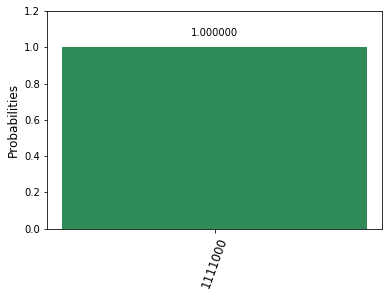

In [10]:
#other way complire and run:
job = execute(qc, backend='local_qasm_simulator', shots=1024, max_credits=3)

lapse = 0
interval = 5
while not job.done:
    print('Status @ {} seconds'.format(interval * lapse))
    print(job.status)
    time.sleep(interval)
    lapse += 1
print(job.status)

print(job.result().get_counts(qc))
plot_histogram(job.result().get_counts(qc))

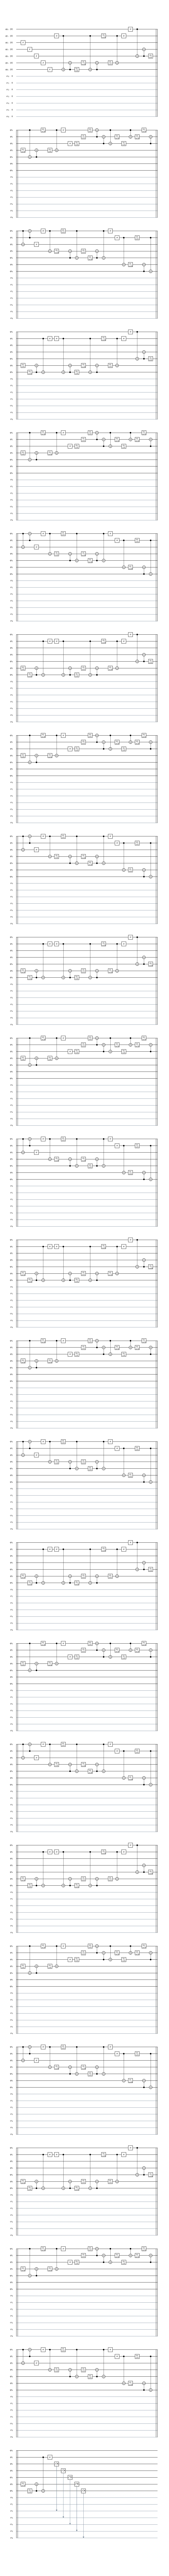

In [11]:
#the circuit running is not the one we write
qobj = compile(qc, backend='local_qasm_simulator')

qasm_str = qp.get_compiled_qasm(qobj, 'Circuit')

qasm_circ = qiskit.load_qasm_string(qasm_str);
circuit_drawer(qasm_circ)

In [12]:
print(qasm_str)

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[7];
creg cr[7];
x qr[2];
x qr[3];
x qr[4];
x qr[5];
x qr[6];
h qr[1];
cx qr[1],qr[6];
cx qr[6],qr[5];
u1(0.785398163397448) qr[6];
u1(-0.785398163397448) qr[5];
cx qr[1],qr[6];
cx qr[6],qr[5];
u1(-0.785398163397448) qr[1];
u1(0.785398163397448) qr[5];
cx qr[1],qr[5];
h qr[1];
h qr[0];
cx qr[0],qr[4];
cx qr[4],qr[3];
u1(0.785398163397448) qr[4];
u1(-0.785398163397448) qr[3];
cx qr[0],qr[4];
cx qr[4],qr[3];
u1(-0.785398163397448) qr[0];
u1(0.785398163397448) qr[3];
cx qr[0],qr[3];
h qr[0];
h qr[2];
u1(0.785398163397448) qr[2];
u1(0.785398163397448) qr[1];
u1(0.785398163397448) qr[0];
cx qr[1],qr[0];
cx qr[2],qr[1];
cx qr[0],qr[2];
u1(-0.785398163397448) qr[1];
u1(0.785398163397448) qr[2];
cx qr[0],qr[1];
u1(-0.785398163397448) qr[1];
u1(-0.785398163397448) qr[0];
cx qr[2],qr[1];
cx qr[0],qr[2];
cx qr[1],qr[0];
h qr[2];
h qr[0];
cx qr[0],qr[3];
u1(-0.785398163397448) qr[3];
u1(0.785398163397448) qr[0];
cx qr[4],qr[3];
cx qr[0],qr[4];
u1(0.785398

# Running on real device

In [13]:
def lowest_pending_jobs():
    """Returns the backend with lowest pending jobs."""
    list_of_backends = available_backends(
        {'local': False, 'simulator': False})
    device_status = [get_backend(backend).status
                     for backend in list_of_backends]

    best = min([x for x in device_status if x['operational'] is True],
               key=lambda x: x['pending_jobs'])
    return best['name']

backend = lowest_pending_jobs()
print("The best backend is " + backend)

The best backend is ibmqx5


In [14]:
#to this case we need ibmqx5 - 16 qubits
backend = 'ibmqx5'
api.backend_status(backend)

{'available': True, 'backend': 'ibmqx5', 'pending_jobs': 1}

In [15]:
api.backend_calibration(backend)

{'backend': 'ibmqx5',
 'lastUpdateDate': '2018-08-18T02:43:31.000Z',
 'multiQubitGates': [{'gateError': {'date': '2018-08-18T02:43:31Z',
    'value': 0.04863444660910826},
   'name': 'CX1_0',
   'qubits': [1, 0],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-18T02:10:43Z', 'value': 0.04857625749319239},
   'name': 'CX1_2',
   'qubits': [1, 2],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-18T02:10:43Z',
    'value': 0.041232708117348776},
   'name': 'CX2_3',
   'qubits': [2, 3],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-18T02:10:43Z', 'value': 0.04662501906007513},
   'name': 'CX3_4',
   'qubits': [3, 4],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-18T02:43:31Z', 'value': 0.06369683140719659},
   'name': 'CX3_14',
   'qubits': [3, 14],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-18T02:10:43Z',
    'value': 0.027356398613308186},
   'name': 'CX5_4',
   'qubits': [5, 4],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-18T02:10:43Z', 'value': 0.04

In [16]:
api.backend_parameters(backend)

{'backend': 'ibmqx5',
 'fridgeParameters': {'Temperature': {'date': '2018-08-17T18:37:58Z',
   'unit': 'K',
   'value': 0.014428},
  'cooldownDate': '2017-09-15'},
 'lastUpdateDate': '2018-08-18T01:30:13.000Z',
 'qubits': [{'T1': {'date': '2018-08-18T01:29:10Z',
    'unit': 'µs',
    'value': 34.9},
   'T2': {'date': '2018-08-18T01:30:13Z', 'unit': 'µs', 'value': 23.1},
   'buffer': {'date': '2018-08-18T01:05:17Z', 'unit': 'ns', 'value': 10},
   'frequency': {'date': '2018-08-18T01:05:17Z',
    'units': 'GHz',
    'value': 5.2559447},
   'gateTime': {'date': '2018-08-18T01:05:17Z', 'unit': 'ns', 'value': 80},
   'name': 'Q0'},
  {'T1': {'date': '2018-08-18T01:29:10Z', 'unit': 'µs', 'value': 36},
   'T2': {'date': '2018-08-18T01:30:13Z', 'unit': 'µs', 'value': 54.4},
   'buffer': {'date': '2018-08-18T01:05:17Z', 'unit': 'ns', 'value': 10},
   'frequency': {'date': '2018-08-18T01:05:17Z',
    'units': 'GHz',
    'value': 5.396006},
   'gateTime': {'date': '2018-08-18T01:05:17Z', 'unit': 

In [17]:
qobj = compile(qc, backend=backend)

qs_str = qp.get_compiled_qasm(qobj, 'Circuit')

qs_circ = qiskit.load_qasm_string(qs_str);
circuit_drawer(qs_circ)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb300fd0e18> (for post_execute):


ValueError: Image size of 1384x147429 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1384x147429 pixels is too large. It must be less than 2^16 in each direction.

In [18]:
print(qs_str)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[16];
creg cr[7];
u3(3.14159265358979,0,3.14159265358979) q[15];
u3(3.14159265358979,0,3.14159265358979) q[14];
u3(3.14159265358979,0,3.14159265358979) q[13];
u3(3.14159265358979,0,3.14159265358979) q[3];
u3(3.14159265358979,0,3.14159265358979) q[2];
u2(0,3.14159265358979) q[1];
cx q[15],q[14];
cx q[1],q[2];
u2(0,3.14159265358979) q[14];
u2(0,3.14159265358979) q[15];
cx q[15],q[14];
u2(0,3.14159265358979) q[14];
u2(0,3.14159265358979) q[15];
cx q[15],q[14];
cx q[13],q[14];
u2(0,3.14159265358979) q[15];
cx q[15],q[0];
u2(0,3.14159265358979) q[14];
u2(0,3.14159265358979) q[13];
cx q[13],q[14];
u2(0,3.14159265358979) q[14];
u2(0,3.14159265358979) q[13];
cx q[13],q[14];
u2(0.785398163397448,3.14159265358979) q[13];
u2(0,3.14159265358979) q[2];
u2(0,3.14159265358979) q[1];
cx q[1],q[2];
u2(0,3.14159265358979) q[2];
u2(0,3.14159265358979) q[1];
cx q[1],q[2];
cx q[2],q[3];
u2(0,3.14159265358979) q[1];
u2(0,3.14159265358979) q[3];
u2(0,3.14159265358979

In [19]:
shots=1024
max_credits=3
job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)

lapse = 0
interval = 10
while not job_exp.done:
    print('Status @ {} seconds'.format(interval * lapse))
    print(job_exp.status)
    time.sleep(interval)
    lapse += 1
print(job_exp.status)

Status @ 0 seconds
{'job_id': None, 'status': <JobStatus.INITIALIZING: 'job is being initialized'>, 'status_msg': 'Job is initializing. Please, wait a moment.'}
Status @ 10 seconds
{'job_id': '5b77ee9690e729004304e3e0', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 2}
Status @ 20 seconds
{'job_id': '5b77ee9690e729004304e3e0', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 1}
Status @ 30 seconds
{'job_id': '5b77ee9690e729004304e3e0', 'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': 'job is actively running'}
Status @ 40 seconds
{'job_id': '5b77ee9690e729004304e3e0', 'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': 'job is actively running'}
{'job_id': '5b77ee9690e729004304e3e0', 'status': <JobStatus.DONE: 'job has successfully run'>, 'status_msg': 'job has successfully run'}


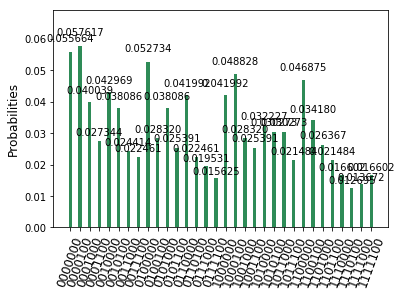

In [20]:
plot_histogram(job_exp.result().get_counts(qc))

In [21]:
job_exp.result().get_data('Circuit')

{'counts': {'0000000': 57,
  '0000100': 59,
  '0001000': 41,
  '0001100': 28,
  '0010000': 44,
  '0010100': 39,
  '0011000': 25,
  '0011100': 23,
  '0100000': 54,
  '0100100': 29,
  '0101000': 39,
  '0101100': 26,
  '0110000': 43,
  '0110100': 23,
  '0111000': 20,
  '0111100': 16,
  '1000000': 43,
  '1000100': 50,
  '1001000': 29,
  '1001100': 26,
  '1010000': 33,
  '1010100': 31,
  '1011000': 31,
  '1011100': 22,
  '1100000': 48,
  '1100100': 35,
  '1101000': 27,
  '1101100': 22,
  '1110000': 17,
  '1110100': 13,
  '1111000': 14,
  '1111100': 17},
 'date': '2018-08-18T10:02:52.633Z',
 'time': 26.378247022628784}